In [1]:
import numpy as np
import pandas as pd
import os
print(os.listdir("../input"))

['resources.csv', 'train.csv', 'test.csv', 'sample_submission.csv']


In [2]:
data = pd.read_csv('../input/train.csv')

In [3]:
previously_posted = data[['teacher_number_of_previously_posted_projects','project_is_approved']]

Text(0,0.5,'Number of previous submissions')

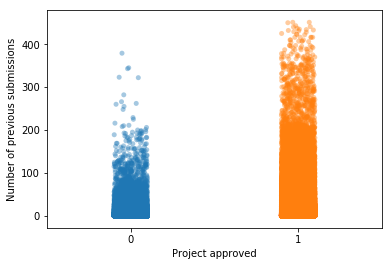

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.stripplot(x='project_is_approved',
              y='teacher_number_of_previously_posted_projects',
              data=previously_posted,
              jitter=True,
              alpha=0.4)
plt.xlabel('Project approved')
plt.ylabel('Number of previous submissions')

Here is a good way to visualize the distribution of how many times you would have to post a project to obtain approval. I think the way to understand this is to say that if you have more attempts at asking for approval, you tend to gain experience in knowing what you should say or write. However, there are some people who have made a lot of postings but still, for whatever reason, did not get this particular project approved (see the outliers in the project rejected column). The visualization is a good start and shows that if you have written about 200 or more project proposals, you actually have a pretty good chance of being approved, at least, judging by the density. Let's try to put some harder numbers to this.

In [5]:
previously_posted_approved = previously_posted[previously_posted['project_is_approved'] == 1].drop('project_is_approved',axis=1)
previously_posted_rejected = previously_posted[previously_posted['project_is_approved'] == 0].drop('project_is_approved',axis=1)

Here I'd like to check the histogram

NameError: name 'bins' is not defined

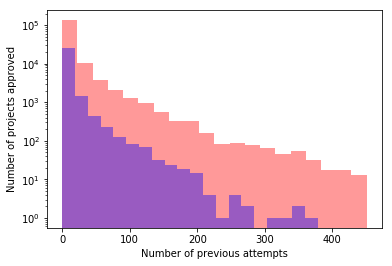

In [8]:
(num_approved,bins_approved,patches_approved)= plt.hist(previously_posted_approved['teacher_number_of_previously_posted_projects'],
                                                        bins=20, color='r',
                                                        alpha=0.4, label='Approved',
                                                       log=True)
(num_rejected,bins_rejected,patches_rejected) = plt.hist(previously_posted_rejected['teacher_number_of_previously_posted_projects'],
                                                        bins=20, color='b',
                                                        alpha=0.4, label='Rejected',
                                                        log=True)

plt.xlabel('Number of previous attempts')
plt.ylabel('Number of projects approved')

plt.xticks(bins, rotation='vertical')

plt.legend()

plt.show()

I think it's pretty clear here that if you have more experience because of previous attempts, it's a lot more likely to get approval.

Text(0,0.5,'Probability approved')

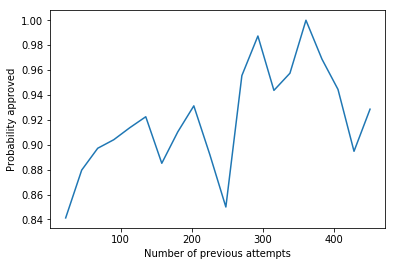

In [9]:
num_total = num_approved + num_rejected
num_total[num_total == 0] = 1
probability_approval = num_approved / num_total
probability_approval_binned = pd.DataFrame()
bins_approved = bins_approved[1:]
probability_approval_binned['num_prev_attempt'] = bins_approved
probability_approval_binned['probability'] = probability_approval

plt.plot(probability_approval_binned['num_prev_attempt'],
        probability_approval_binned['probability'])

plt.xlabel('Number of previous attempts')
plt.ylabel('Probability approved')

With the exception of that dip around 250 previous attempts, it looks pretty decisive that as long as you have a lot of experience, you're a lot more likely to get approval. Note here that the plot is slightly misleading, because there is still only an approximately 15% rejection rate at the worst case. Objectively, there's still a pretty huge chance of being approved.

Here, I would consider trying to model the approval rate with a linear function or maybe something like a log or square root function due to the diminishing returns around 300 attempts.